In [1]:
!pip install seaborn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/Google_Stock_Train (2010-2022).csv')

In [5]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028
5,2010-01-11,15.126627,15.126627,14.865866,15.042793,15.042793,288227484
6,2010-01-12,14.956206,14.968969,14.714715,14.776777,14.776777,193937868
7,2010-01-13,14.426677,14.724224,14.361862,14.691942,14.691942,259604136
8,2010-01-14,14.612112,14.869870,14.584835,14.761011,14.761011,169434396
9,2010-01-15,14.848348,14.853854,14.465465,14.514515,14.514515,217162620


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3272 non-null   object 
 1   Open       3272 non-null   float64
 2   High       3272 non-null   float64
 3   Low        3272 non-null   float64
 4   Close      3272 non-null   float64
 5   Adj Close  3272 non-null   float64
 6   Volume     3272 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 179.1+ KB


In [7]:
df.shape

(3272, 7)

In [8]:
df.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
3267,False,False,False,False,False,False,False
3268,False,False,False,False,False,False,False
3269,False,False,False,False,False,False,False
3270,False,False,False,False,False,False,False


In [9]:
df.query("High>60")

,Date,Open,High,Low,Close,Adj Close,Volume
2130,2018-06-20,59.165001,60.074501,59.101501,59.203499,59.203499,51686000
2145,2018-07-12,58.743000,60.099499,58.654999,60.063000,60.063000,44148000
2146,2018-07-13,60.139999,60.521999,59.764500,60.221001,60.221001,32612000
2147,2018-07-16,60.190498,60.435501,59.669998,59.825500,59.825500,26784000
2148,2018-07-17,59.137001,60.938000,59.099998,60.653999,60.653999,40162000
...,...,...,...,...,...,...,...
3267,2022-12-23,87.110001,89.550003,87.070000,89.230003,89.230003,23003000
3268,2022-12-27,88.800003,88.940002,87.010002,87.389999,87.389999,20097300
3269,2022-12-28,86.980003,88.040001,85.940002,86.019997,86.019997,19523200
3270,2022-12-29,86.620003,88.849998,86.610001,88.449997,88.449997,23333500


In [10]:
df.nunique()

Date         3272
Open         3204
High         3184
Low          3215
Close        3239
Adj Close    3239
Volume       3163
dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable h

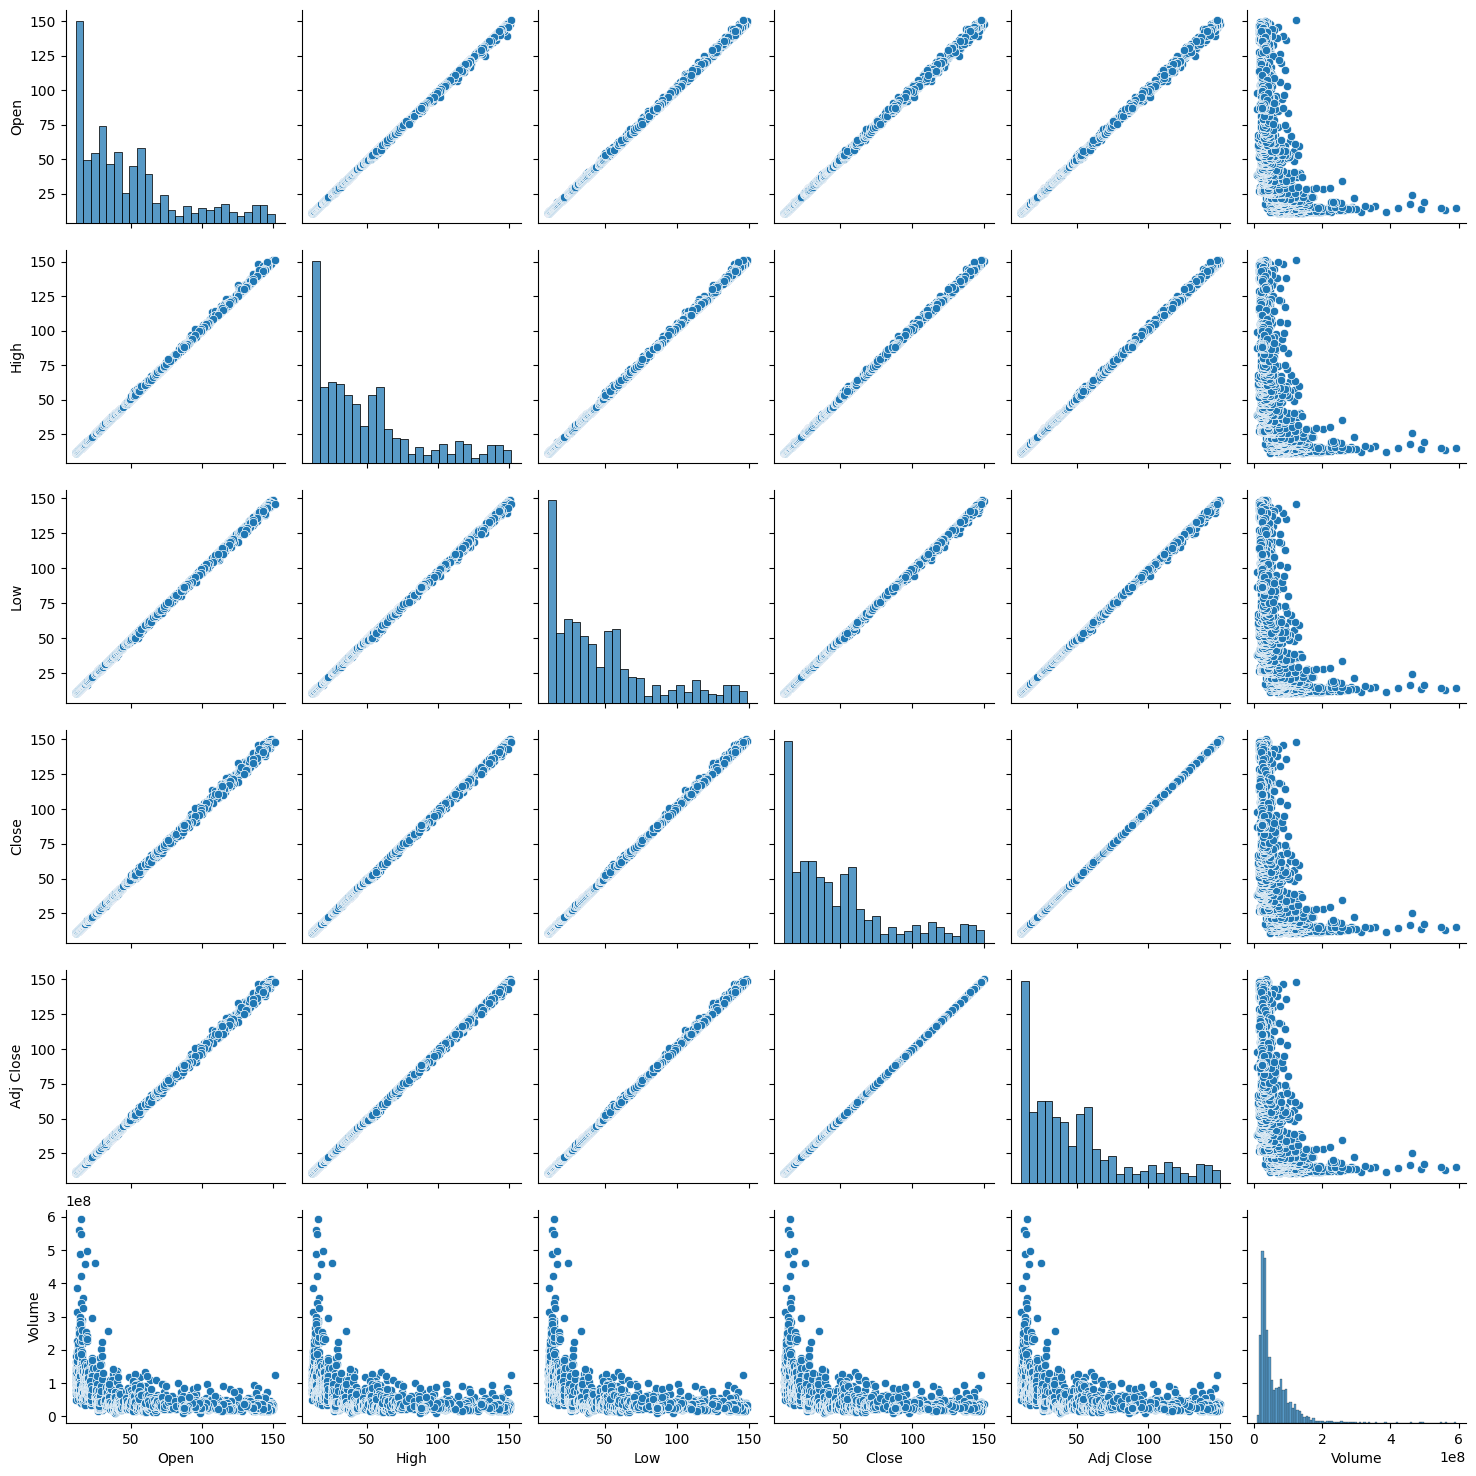

In [11]:
number_of_columns = ["Date","Open","High","Low","Close","Adj Close","Volume"]
sns.pairplot(df[number_of_columns], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

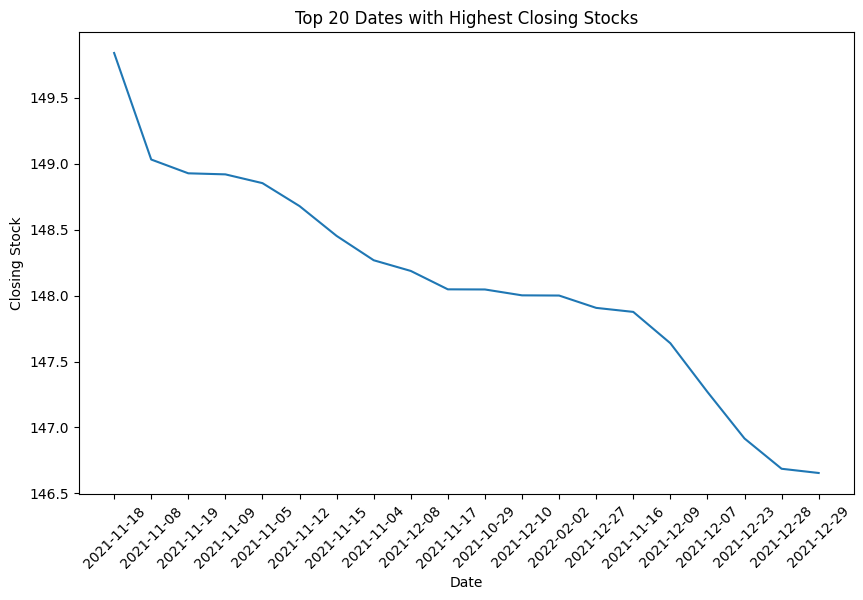

In [12]:
def plot_top_5_highest_closing_stock(file_path):
    #Sort the DataFrame based on the "close" column in descending order
    df_sorted = df.sort_values(by='Close', ascending=False)

    #Select the top 20 rows from the sorted DataFrame
    top_20_dates = df_sorted.head(20)

    #Use seaborn to create a plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(x="Date", y="Close", data=top_20_dates)
    plt.xlabel('Date')
    plt.ylabel('Closing Stock')
    plt.title('Top 20 Dates with Highest Closing Stocks')
    plt.xticks(rotation=45)
    plt.show()

# Replace 'your_file_path.xlsx' with the actual path to your Excel file.
file_path = 'Google_Stock_Train (2010-2022).csv'
plot_top_5_highest_closing_stock(file_path)

In [13]:
#find the day with the most closing stocks
def day_with_highest_close(file_path):
  #find the row of closing stocks
  max_close_stocks = df.loc[df['Close'].idxmax()]
  #extract the date of the stocks
  date_max_stocks = max_close_stocks['Date']
  return date_max_stocks
file_path = 'Google_Stock_Train (2010-2022).csv'
date_of_max_stock = day_with_highest_close(file_path)

print("Day with the highest closing stock:", date_of_max_stock)

Day with the highest closing stock: 2021-11-18


In [14]:
!pip install scikeras

In [15]:
#we now move to the machine learning aspect including predictions
#Here we have our test data too
# we will also use linear regression to regulate the changes in the stock prices
from keras.models import Sequential
from keras.layers import Dense
test =  pd.read_csv('/content/Google_Stock_Test (2023).csv')

In [16]:
test.head(100)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
1,2023-01-04,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
2,2023-01-05,87.470001,87.570000,85.900002,86.199997,86.199997,27194400
3,2023-01-06,86.790001,87.690002,84.860001,87.339996,87.339996,41381500
4,2023-01-09,88.360001,90.050003,87.860001,88.019997,88.019997,29003900
...,...,...,...,...,...,...,...
95,2023-05-19,123.550003,125.970001,122.150002,122.760002,122.760002,41330300
96,2023-05-22,122.940002,126.430000,122.739998,125.050003,125.050003,35253000
97,2023-05-23,124.160004,124.629997,122.209999,122.559998,122.559998,34046300
98,2023-05-24,121.120003,121.910004,119.860001,120.900002,120.900002,34182600


In [17]:
#drop non numerical columns
column = test.select_dtypes(include=['number'])
test = test[column.columns]
print(test)

           Open        High         Low       Close   Adj Close    Volume
0     89.589996   91.050003   88.519997   89.120003   89.120003  28131200
1     90.349998   90.650002   87.269997   88.080002   88.080002  34854800
2     87.470001   87.570000   85.900002   86.199997   86.199997  27194400
3     86.790001   87.690002   84.860001   87.339996   87.339996  41381500
4     88.360001   90.050003   87.860001   88.019997   88.019997  29003900
..          ...         ...         ...         ...         ...       ...
138  121.660004  123.000000  120.980003  121.529999  121.529999  29686100
139  121.360001  123.150002  121.019997  122.209999  122.209999  52509600
140  130.070007  130.979996  128.320007  129.270004  129.270004  61682100
141  131.669998  133.240005  128.789993  129.399994  129.399994  44952100
142  130.779999  133.740005  130.570007  132.580002  132.580002  36572900

[143 rows x 6 columns]


In [18]:
test.head()

,Open,High,Low,Close,Adj Close,Volume
0,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
1,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
2,87.470001,87.570000,85.900002,86.199997,86.199997,27194400
3,86.790001,87.690002,84.860001,87.339996,87.339996,41381500
4,88.360001,90.050003,87.860001,88.019997,88.019997,29003900


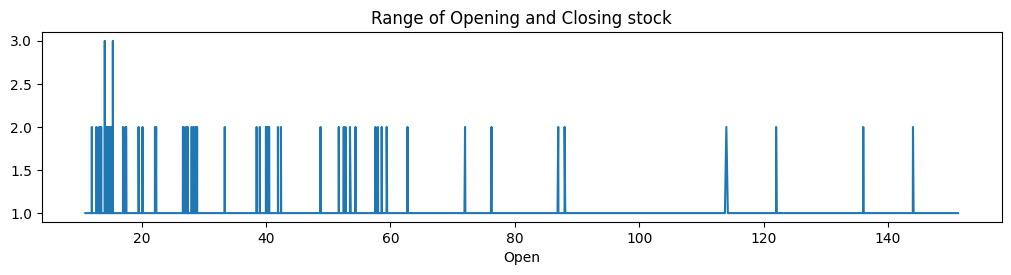

In [20]:
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1,)
(df.groupby('Open')['Close'].nunique()).plot()
plt.title("Range of Opening and Closing stock")




plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.3,
                    wspace=0.4,
                    hspace=0.4)

plt.show()

In [21]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
Target = ['High']
Parameters = ['Adj Close','Open','High','Low','Close','Volume']
X = test[Parameters].values
Y = test[Target].values

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
X_scaler = StandardScaler()
Y_scaler =StandardScaler()
x_fit = X_scaler.fit(X)
y_fit = Y_scaler.fit(Y)
# Generating the standardized values of X and y
X = x_fit.transform(X)
y = y_fit.transform(Y)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=42)

In [26]:
# build the model!
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear')) # output node
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1000)              7000      
                                                                 
 dense_4 (Dense)             (None, 500)               500500    
                                                                 
 dense_5 (Dense)             (None, 250)               125250    
                                                                 
 dense_6 (Dense)             (None, 1)                 251       
                                                                 
Total params: 633001 (2.41 MB)
Trainable params: 633001 (2.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
#compile the model
model.compile(optimizer="adam",loss="mse",metrics=['accuracy','mae'])

In [28]:
from keras.callbacks import EarlyStopping

In [30]:
es = EarlyStopping(monitor='val_loss',
                   mode='min',patience=50,restore_best_weights=True)

In [34]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=50,
                    batch_size=50,
                    verbose=1)

Epoch 1/50
3/3 [==============================] - 0s 34ms/step - loss: 9.3537e-04 - accuracy: 0.0000e+00 - mae: 0.0224 - val_loss: 0.0025 - val_accuracy: 0.0000e+00 - val_mae: 0.0372
Epoch 2/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0013 - accuracy: 0.0000e+00 - mae: 0.0264 - val_loss: 0.0016 - val_accuracy: 0.0000e+00 - val_mae: 0.0326
Epoch 3/50
3/3 [==============================] - 0s 17ms/step - loss: 8.4698e-04 - accuracy: 0.0000e+00 - mae: 0.0234 - val_loss: 0.0029 - val_accuracy: 0.0000e+00 - val_mae: 0.0409
Epoch 4/50
3/3 [==============================] - 0s 20ms/step - loss: 0.0017 - accuracy: 0.0000e+00 - mae: 0.0309 - val_loss: 7.7217e-04 - val_accuracy: 0.0000e+00 - val_mae: 0.0236
Epoch 5/50
3/3 [==============================] - 0s 20ms/step - loss: 5.0807e-04 - accuracy: 0.0000e+00 - mae: 0.0177 - val_loss: 0.0020 - val_accuracy: 0.0000e+00 - val_mae: 0.0362
Epoch 6/50
3/3 [==============================] - 0s 19ms/step - loss: 9.7028e-04 - accur

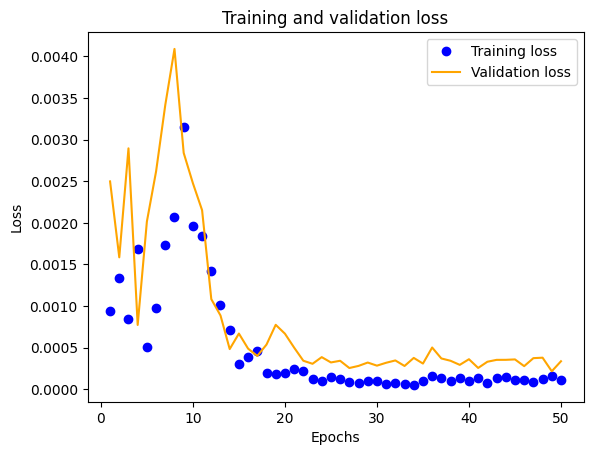

In [35]:
# see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

2/2 [==============================] - 0s 6ms/step


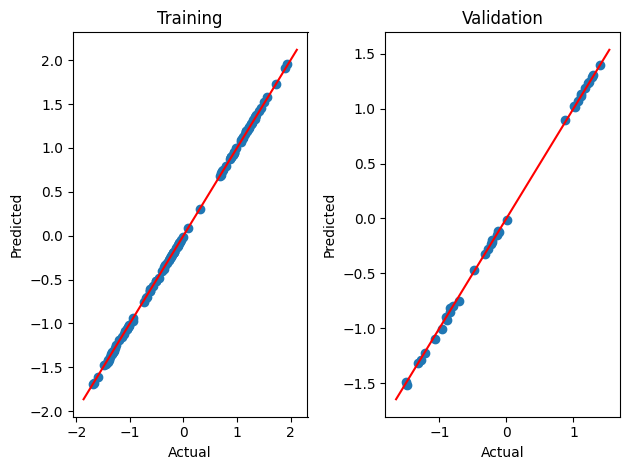

In [37]:

# scatterplot of actual vs. pred
# specify the dimensions
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [38]:
# metrics
pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

4/4 [==============================] - 0s 3ms/step
0.007461130162015944
0.01366003690249054


In [39]:
from keras.layers import Dense, Dropout

In [40]:
from keras.layers import Dense, Dropout

# Insert the dropout layer
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1000)              7000      
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_8 (Dense)             (None, 500)               500500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_9 (Dense)             (None, 250)               125250    
                                                                 
 dropout_2 (Dropout)         (None, 250)               0         
                                                                 
 dense_10 (Dense)            (None, 1)                